In [9]:
%matplotlib notebook
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pylab

In [10]:
hw_frame = pd.read_csv('filterdatasetnoname.csv', delimiter=',',header=1, names=['KODERS', 'TTD', 'TM', 'DPRS'])
CSV_PATH = 'filterdatasetnoname.csv'

dataset = tf.contrib.data.make_csv_dataset(CSV_PATH, batch_size=338)
iter = dataset.make_one_shot_iterator()
next = iter.get_next()

# bellow is a dict with all feature in the datasets
print(next, '\n')
KODERS, TTD, TM, DPRS = next['KODERS'], next['TTD'], next['TM'], next['DPRS']

with  tf.Session() as sess:
    print(sess.run([KODERS, TTD, TM, DPRS]))

OrderedDict([('KODERS', <tf.Tensor 'IteratorGetNext_1:1' shape=(?,) dtype=int32>), ('TTD', <tf.Tensor 'IteratorGetNext_1:3' shape=(?,) dtype=int32>), ('TM', <tf.Tensor 'IteratorGetNext_1:2' shape=(?,) dtype=int32>), ('DPRS', <tf.Tensor 'IteratorGetNext_1:0' shape=(?,) dtype=int32>)]) 

[array([ 3276017,  3172520,  3671208,  3275017,  3201061,  3171792,
        3671065,  3173656,  3173532,  3201243,  3171796,  3216174,
        3275207,  3173695,  3671204,  3173036,  3171034,  3671207,
        3216429,  3171802,  3172137,  3173700,  3275229,  3275057,
        3171798,  3216285,  3216389,  3175042,  3275064,  3171643,
        3674014,  3175411,  3216218,  3275024,  3275053,  3172750,
        3171791,  3173073,  3171515,  3173697,  3171574,  3671214,
        3172520,  3172757,  3171665,  3216362,  3276124,  3175410,
        3171680,  3201072,  3172050,  3173699,  3271013,  3271046,
        3671126,  3275039,  3172126,  3173120,  3174431,   317541,
        3275263,  3171012,  3271162,  3271

In [11]:
def ScatterPlot(X, Y, assignments=None, centers=None):
    if assignments is None:
        assignments = [0] * len(X)
    
    fig = plt.figure(figsize=(14,8))
    cmap = ListedColormap(['red', 'green', 'blue', 'magenta'])
    plt.scatter(X, Y, c=assignments, cmap=cmap)
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c=range(len(centers)), marker='+', s=400, cmap=cmap)  
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    # pylab.ylim(-1.5, 2.0)
    plt.legend('')
    plt.show()

<IPython.core.display.Javascript object>


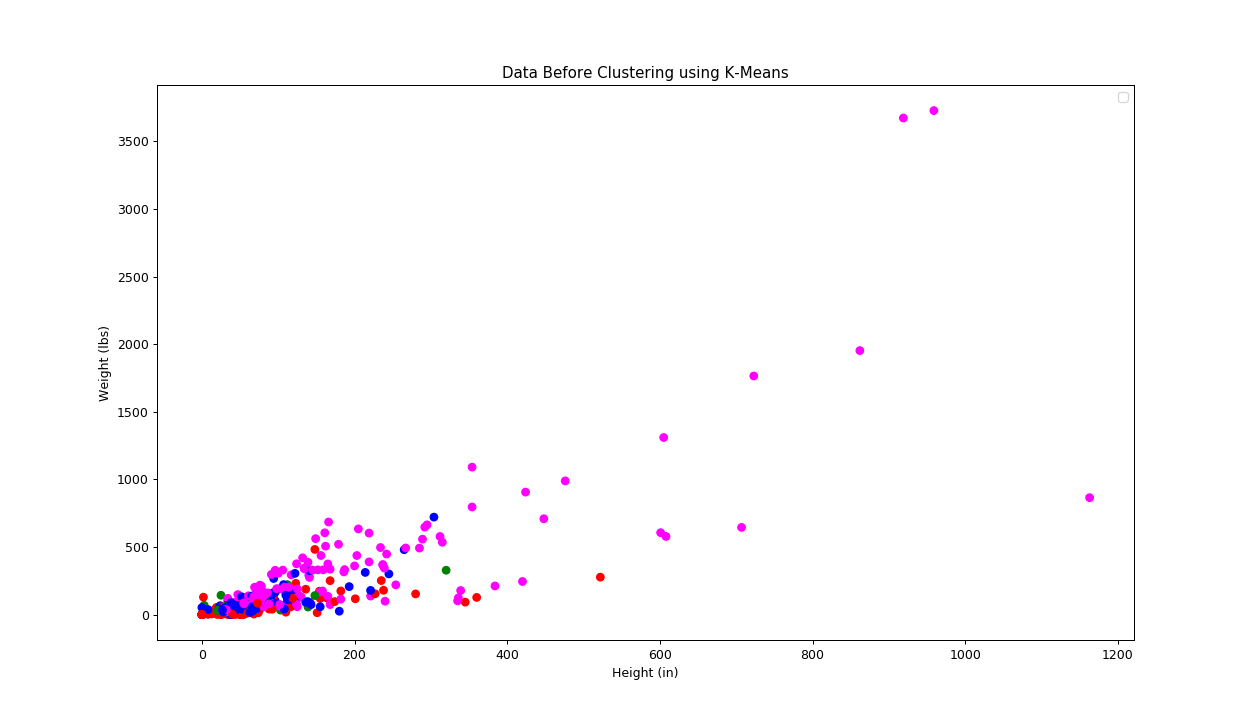

Text(0.5,1,'Data Before Clustering using K-Means')

In [12]:
ScatterPlot(hw_frame.TTD, hw_frame.TM, hw_frame.DPRS)
plt.title('Data Before Clustering using K-Means')

In [13]:
def input_fn():
    return tf.constant(hw_frame.values, tf.float32, hw_frame.shape), None

In [14]:
tf.logging.set_verbosity(tf.logging.ERROR)
kmeans = tf.contrib.learn.KMeansClustering(num_clusters=4, relative_tolerance=0.0001)
_ = kmeans.fit(input_fn=input_fn)

In [15]:
clusters = kmeans.clusters()
assignments = list(kmeans.predict_cluster_idx(input_fn=input_fn))

<IPython.core.display.Javascript object>


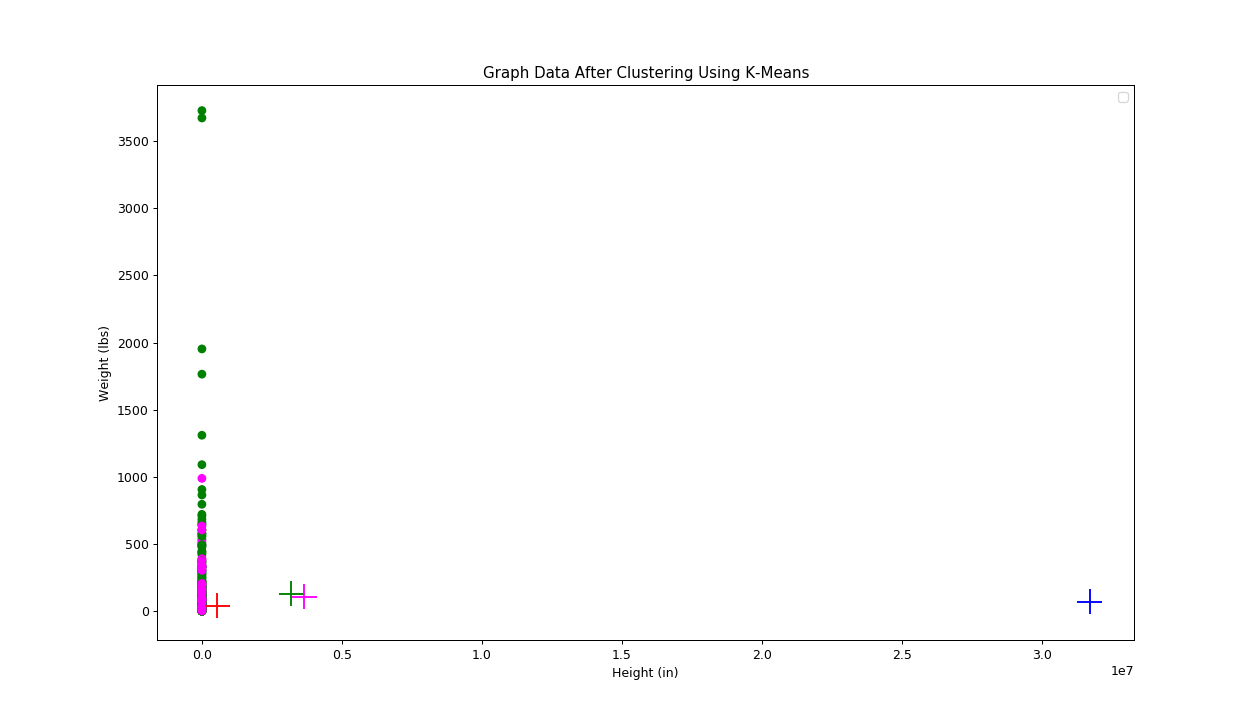

Text(0.5,1,'Graph Data After Clustering Using K-Means')

In [16]:
# ScatterPlot(hw_frame.TTD, hw_frame.TM, assignments, clusters)
ScatterPlot(hw_frame.TTD, hw_frame.TM, assignments, clusters)
plt.title('Graph Data After Clustering Using K-Means')